In [2]:
import matplotlib.pyplot as plt
from skest import *
import scipy
import time
from signals import *
import numpy as np

### different n

In [2]:
sigma = 1

In [3]:
n = 60

In [4]:
p = 110
Psi = toeplitz(0.5, p)

In [5]:
beta_star = smooth_stair(10, 5, 20, 0, 4)

In [6]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [7]:
naive_cv_cov(X)

({'t': 0.45}, 2.522055149078369)

In [8]:
D_w = weighted_incidence(cov_est(0.45).fit(X).S)

In [9]:
D_oracle = weighted_incidence(Psi)

In [10]:
D = chain_incidence(p)

In [11]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.4208717346191406)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -5870.17551584  -5868.41929266  -5872.06625824  -5908.85738775
  -5970.43887729  -6074.14368078  -6284.09075882  -6707.72436027
  -7130.91885517  -7960.83378972  -8957.56937277  -9902.62350368
 -10813.60897122 -11676.66380986 -13302.18747041 -14807.91158032
 -16215.10128748 -18775.58130845 -21282.95187597 -25738.3685244
 -29555.91435312 -20821.65799756  -6028.92935623  -5888.01834494
  -5910.49442745  -5971.18034279  -6074.61298106  -6284.28321494
  -6708.06652776  -7131.01781478  -7960.97687795  -8957.44103815
  -9906.44606963 -10811.8024776  -11676.37915615 -13300.07814373
 -14799.27444688 -16195.5162969  -18722.71259045 -20963.02516408
 -25665.65242617 -29637.72452224 -20821.82567921  -7383.77689086
  -6033.1265766   -5925.06521112  -5976.90768555  -6077.42767278
  -6285.84517309  -6708.80645     -7131.58129438  -7961.38918649
  -8957.91708

({'l1': 0, 'l2': 0.001}, 12.050302743911743)
({'l1': 0, 'l2': 5}, 9.77045464515686)
({'l1': 1, 'l2': 7.5}, 14.078492164611816)


In [12]:
print(naive_cv_gtv_small(X, y, D_oracle))

({'l1': 5, 'l2': 1, 'l3': 0}, 72.6539421081543)


In [18]:
print(naive_cv_gtv(X, y, D_w))

({'l1': 20, 'l2': 0, 'l3': 0}, 12.801423788070679)


In [19]:
naive_cv(OUR, X, y, D)

({'l1': 30, 'l2': 3}, 11.804295301437378)

In [11]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 5, D).fit(X,y)
    clf5 = SL(1, 7.5, D).fit(X,y)
    clf6 = GTV(20, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(10, 5, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [12]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 5, D).fit(X,y)
    clf5 = SL(1, 7.5, D).fit(X,y)
    clf6 = GTV(20, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(10, 5, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [13]:
from joblib import Parallel, delayed
import multiprocessing

In [14]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [15]:
ar1 = [l[0] for l in l2s]
ar2 = [l[1] for l in l2s]
ar3 = [l[2] for l in l2s]
ar4 = [l[3] for l in l2s]
ar5 = [l[4] for l in l2s]
ar6 = [l[5] for l in l2s]
ar7 = [l[6] for l in l2s]
ar8 = [l[7] for l in l2s]

In [16]:
ap1 = [l[0] for l in preds]
ap2 = [l[1] for l in preds]
ap3 = [l[2] for l in preds]
ap4 = [l[3] for l in preds]
ap5 = [l[4] for l in preds]
ap6 = [l[5] for l in preds]
ap7 = [l[6] for l in preds]
ap8 = [l[7] for l in preds]


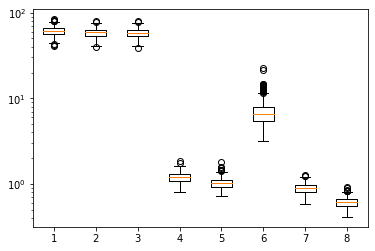

In [26]:
plt.boxplot([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8])
plt.yscale("log")

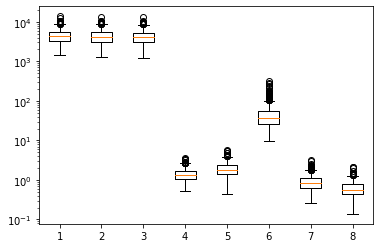

In [27]:
plt.boxplot([ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8])
plt.yscale("log")

### n = 90

In [17]:
n = 90

In [18]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [19]:
naive_cv_cov(X)

({'t': 0.35}, 0.0523836612701416)

In [20]:
D_w = weighted_incidence(cov_est(0.35).fit(X).S)

In [38]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.5585200786590576)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -1725.85506085  -1726.00907938  -1728.61459002  -1754.8254052
  -1799.25613791  -1874.59993157  -2026.79105737  -2327.09375697
  -2617.35209607  -3171.13990367  -3826.16964647  -4452.68130463
  -5059.79226217  -5645.68592136  -6770.49314735  -7840.57828858
  -8872.695993   -10858.8797752  -12642.11124195 -16690.97300449
 -20243.36727565 -10782.03567137  -1808.09508901  -1736.81705866
  -1755.60667106  -1799.58815771  -1874.90202436  -2027.16396411
  -2327.21207575  -2617.24945562  -3171.05307688  -3826.52225901
  -4452.94364267  -5056.80417813  -5640.94872133  -6753.05235164
  -7825.7105292   -8861.64638317 -10738.80108037 -12461.07628258
 -16438.2829324  -19852.10879328 -10782.51765603  -2512.32443306
  -1811.11461434  -1763.11967058  -1802.68290514  -1876.45057711
  -2027.98006256  -2327.71240457  -2617.60619732  -3171.25904646
  -3827.09173

({'l1': 0, 'l2': 0}, 16.182448387145996)
({'l1': 1, 'l2': 30}, 14.318191528320312)
({'l1': 0.5, 'l2': 12.5}, 17.87109136581421)


In [39]:
print(naive_cv_gtv_small(X, y, D_oracle))


({'l1': 5, 'l2': 1, 'l3': 0}, 72.66547226905823)
({'l1': 7.5, 'l2': 0.001, 'l3': 0}, 20.674692153930664)


In [40]:
print(naive_cv_gtv(X, y, D_w))

({'l1': 7.5, 'l2': 0.001, 'l3': 0}, 20.81934666633606)


In [41]:
naive_cv(OUR, X, y, D)

({'l1': 25, 'l2': 10}, 18.567559957504272)

In [21]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(1, 30, D).fit(X,y)
    clf5 = SL(0.5, 12.5, D).fit(X,y)
    clf6 = GTV(7.5, 0.001, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(25, 10, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [22]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(1, 30, D).fit(X,y)
    clf5 = SL(0.5, 12.5, D).fit(X,y)
    clf6 = GTV(7.5, 0.001, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(25, 10, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [23]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [24]:
br1 = [l[0] for l in l2s]
br2 = [l[1] for l in l2s]
br3 = [l[2] for l in l2s]
br4 = [l[3] for l in l2s]
br5 = [l[4] for l in l2s]
br6 = [l[5] for l in l2s]
br7 = [l[6] for l in l2s]
br8 = [l[7] for l in l2s]

In [25]:
bp1 = [l[0] for l in preds]
bp2 = [l[1] for l in preds]
bp3 = [l[2] for l in preds]
bp4 = [l[3] for l in preds]
bp5 = [l[4] for l in preds]
bp6 = [l[5] for l in preds]
bp7 = [l[6] for l in preds]
bp8 = [l[7] for l in preds]


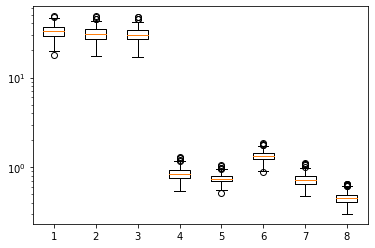

In [47]:
plt.boxplot([br1, br2, br3, br4, br5, br6, br7, br8])
plt.yscale("log")

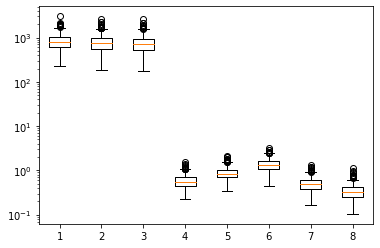

In [48]:
plt.boxplot([bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8])
plt.yscale("log")

### n = 120

In [26]:
n = 120

In [27]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.3}, 0.0589597225189209)

In [28]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [60]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 0.6995325088500977)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  -552.05744721   -552.28194869   -553.19196621   -569.23780941
   -606.48393369   -674.40617974   -807.55797629  -1055.29835198
  -1286.91266797  -1722.51965598  -2235.73186021  -2727.13279369
  -3206.48426622  -3671.13553269  -4566.6228351   -5430.72887498
  -6254.21691636  -7812.70702481  -9256.59194018 -12403.8957986
             nan  -3545.52434056   -575.29279119   -556.09012167
   -569.51465321   -606.69727071   -674.39138374   -807.47386864
  -1055.39755865  -1287.02365408  -1722.32603943  -2235.55041874
  -2727.47990036  -3204.32302763  -3668.71663611  -4561.23680465
  -5412.39688299  -6210.64685288  -7722.22260322  -9138.36211123
 -12318.30200869 -14949.44400289  -3546.58144134   -746.66660326
   -577.27394121   -571.89862701   -607.76301934   -674.9882733
   -807.84138515  -1055.73598306  -1287.18422643  -1722.4956017
  -2235.7664420

({'l1': 0, 'l2': 0}, 22.175856828689575)
({'l1': 0.5, 'l2': 30}, 20.83461093902588)
({'l1': 0.001, 'l2': 12.5}, 23.235474109649658)


In [61]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 5, 'l2': 1, 'l3': 0}, 77.1772027015686)
({'l1': 7.5, 'l2': 0, 'l3': 0}, 28.56595540046692)


In [62]:
naive_cv(OUR, X, y, D)

({'l1': 30, 'l2': 10}, 23.792476654052734)

In [29]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.5,30, D).fit(X,y)
    clf5 = SL(0.001, 12.5, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 10, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.5,30, D).fit(X,y)
    clf5 = SL(0.001, 12.5, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 10, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [30]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [31]:
cr1 = [l[0] for l in l2s]
cr2 = [l[1] for l in l2s]
cr3 = [l[2] for l in l2s]
cr4 = [l[3] for l in l2s]
cr5 = [l[4] for l in l2s]
cr6 = [l[5] for l in l2s]
cr7 = [l[6] for l in l2s]
cr8 = [l[7] for l in l2s]

In [32]:
cp1 = [l[0] for l in preds]
cp2 = [l[1] for l in preds]
cp3 = [l[2] for l in preds]
cp4 = [l[3] for l in preds]
cp5 = [l[4] for l in preds]
cp6 = [l[5] for l in preds]
cp7 = [l[6] for l in preds]
cp8 = [l[7] for l in preds]

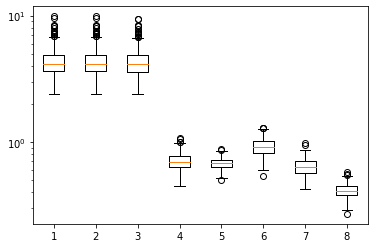

In [67]:
plt.boxplot([cr1, cr2, cr3, cr4, cr5, cr6, cr7, cr8])
plt.yscale("log")

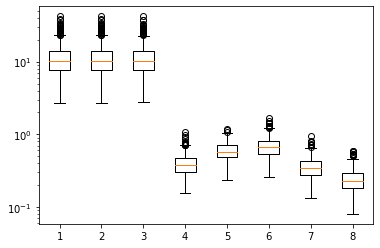

In [68]:
plt.boxplot([cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8])
plt.yscale("log")

### n = 150

In [33]:
n = 150

In [34]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.3}, 0.05165910720825195)

In [35]:
D_w = weighted_incidence(cov_est(0.25).fit(X).S)

In [76]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0.01}, 1.2630815505981445)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   -18.10965291    -17.92778843    -16.83282348    -26.90252372
    -58.44652794   -111.62298101   -211.84682261   -395.4900117
   -568.17947545   -892.60144141  -1279.29074511  -1656.72073248
  -2027.08045099  -2390.79207191  -3113.68985487  -3820.95113083
  -4517.2611472   -5872.86170117  -7221.34724079 -10130.1434893
 -12969.05418436    -18.10886003    -17.92694885    -16.83964051
    -26.92138982    -58.47610045   -111.70183765   -211.95071826
   -396.40003499   -568.33939831   -892.86181346  -1280.08220975
  -1656.72009734  -2026.70841816  -2389.25167731  -3105.65473585
  -3818.07857955  -4487.25380064  -5814.5240835   -7050.65415217
  -9978.16430472 -12539.36822937    -18.10382565    -17.92505761
    -16.86275108    -27.05798042    -58.63653126   -111.86940507
   -212.07960689   -396.50358447   -568.42228758   -893.04102109
  -1280.433865

({'l1': 0, 'l2': 0.01}, 38.967084884643555)
({'l1': 0, 'l2': 30}, 34.026790142059326)
({'l1': 0, 'l2': 20}, 28.505339860916138)


In [77]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 5, 'l2': 1, 'l3': 0}, 76.68286871910095)
({'l1': 7.5, 'l2': 0, 'l3': 0}, 36.18046712875366)


In [78]:
naive_cv(OUR, X, y, D)

({'l1': 30, 'l2': 10}, 29.47459053993225)

In [36]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.01).fit(X,y)
    clf4 = FL(0, 30, D).fit(X,y)
    clf5 = SL(0, 20, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 10, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.01).fit(X,y)
    clf4 = FL(0, 30, D).fit(X,y)
    clf5 = SL(0, 20, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(5, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(30, 10, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [37]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [38]:
dr1 = [l[0] for l in l2s]
dr2 = [l[1] for l in l2s]
dr3 = [l[2] for l in l2s]
dr4 = [l[3] for l in l2s]
dr5 = [l[4] for l in l2s]
dr6 = [l[5] for l in l2s]
dr7 = [l[6] for l in l2s]
dr8 = [l[7] for l in l2s]

In [39]:
dp1 = [l[0] for l in preds]
dp2 = [l[1] for l in preds]
dp3 = [l[2] for l in preds]
dp4 = [l[3] for l in preds]
dp5 = [l[4] for l in preds]
dp6 = [l[5] for l in preds]
dp7 = [l[6] for l in preds]
dp8 = [l[7] for l in preds]

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

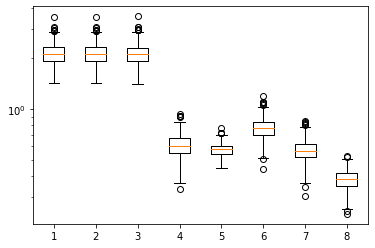

In [83]:
plt.boxplot([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8])
plt.yscale("log")
plt.yticks()

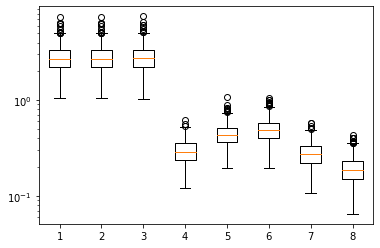

In [84]:
plt.boxplot([dp1, dp2, dp3, dp4, dp5, dp6, dp7, dp8])
plt.yscale("log")

### n = 180

In [40]:
n = 180

In [41]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.25}, 0.055237531661987305)

In [42]:
D_w = weighted_incidence(cov_est(0.25).fit(X).S)

In [106]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 1.3160626888275146)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-4.73307910e+00 -4.73006978e+00 -4.71202443e+00 -5.32375379e+00
 -8.74409662e+00 -1.86165903e+01 -4.63479032e+01 -1.13869391e+02
 -1.87446335e+02 -3.42421415e+02 -5.45421747e+02 -7.54245535e+02
 -9.67662982e+02 -1.18623452e+03 -1.63121778e+03 -2.08661727e+03
 -2.55075349e+03 -3.47653626e+03 -4.41180502e+03 -6.82343665e+03
 -9.01346017e+03 -4.73320786e+00 -4.73022749e+00 -4.71213712e+00
 -5.31990869e+00 -8.75631344e+00 -1.86684456e+01 -4.63755768e+01
 -1.13875278e+02 -1.87548763e+02 -3.42752923e+02 -5.45223501e+02
 -7.54198446e+02 -9.67839428e+02 -1.18404973e+03 -1.62212671e+03
 -2.07439483e+03 -2.52688522e+03 -3.41415077e+03 -4.29811135e+03
 -6.63446560e+03 -8.70575254e+03 -4.73437760e+00 -4.73144171e+00
 -4.71401619e+00 -5.32582815e+00 -8.76791138e+00 -1.86824184e+01
 -4.63972008e+01 -1.13930952e+02 -1.87595299e+02 -3.42815817e+02
 -5.45446344

({'l1': 0, 'l2': 0.01}, 43.800865173339844)
({'l1': 0.001, 'l2': 75}, 37.714072465896606)
({'l1': 1, 'l2': 25}, 32.19362998008728)


In [107]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 10, 'l2': 5, 'l3': 0}, 79.10178089141846)
({'l1': 7.5, 'l2': 0, 'l3': 0}, 39.087626218795776)


In [113]:
naive_cv(OUR, X, y, D)

({'l1': 20, 'l2': 15}, 30.106375694274902)

In [43]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.01).fit(X,y)
    clf4 = FL(0.025, 40, D).fit(X,y)
    clf5 = SL(0, 20, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(10, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 15, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.01).fit(X,y)
    clf4 = FL(0.025, 40, D).fit(X,y)
    clf5 = SL(0, 20, D).fit(X,y)
    clf6 = GTV(7.5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(10, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 15, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [44]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [45]:
er1 = [l[0] for l in l2s]
er2 = [l[1] for l in l2s]
er3 = [l[2] for l in l2s]
er4 = [l[3] for l in l2s]
er5 = [l[4] for l in l2s]
er6 = [l[5] for l in l2s]
er7 = [l[6] for l in l2s]
er8 = [l[7] for l in l2s]

In [46]:
ep1 = [l[0] for l in preds]
ep2 = [l[1] for l in preds]
ep3 = [l[2] for l in preds]
ep4 = [l[3] for l in preds]
ep5 = [l[4] for l in preds]
ep6 = [l[5] for l in preds]
ep7 = [l[6] for l in preds]
ep8 = [l[7] for l in preds]

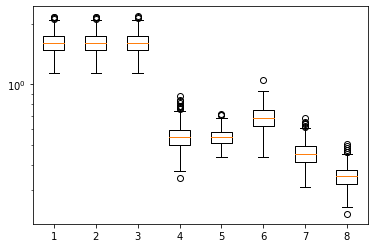

In [118]:
plt.boxplot([er1, er2, er3, er4, er5, er6, er7, er8])
plt.yscale("log")

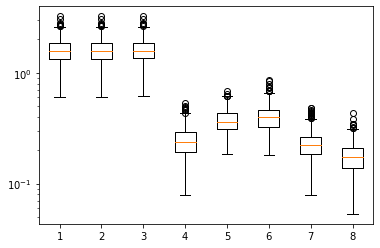

In [119]:
plt.boxplot([ep1, ep2, ep3, ep4, ep5, ep6, ep7, ep8])
plt.yscale("log")

### n = 210

In [47]:
n = 210

In [48]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.25}, 0.04899144172668457)

In [49]:
D_w = weighted_incidence(cov_est(0.25).fit(X).S)

In [145]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0}, 1.4495007991790771)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-3.17045787e+00 -3.17172106e+00 -3.18541400e+00 -3.53420193e+00
 -4.87167305e+00 -8.77949049e+00 -2.10588672e+01 -5.68573216e+01
 -1.01796694e+02 -2.08313881e+02 -3.60723956e+02 -5.26152980e+02
 -7.01127755e+02 -8.82426203e+02 -1.26101467e+03 -1.65245739e+03
 -2.05431655e+03 -2.87870616e+03 -3.70992673e+03 -5.81910236e+03
 -7.76788956e+03 -3.17053267e+00 -3.17179291e+00 -3.18536443e+00
 -3.53470198e+00 -4.87287346e+00 -8.78098403e+00 -2.10718283e+01
 -5.68452715e+01 -1.01832925e+02 -2.08333020e+02 -3.60723575e+02
 -5.26384853e+02 -7.00313924e+02 -8.80612669e+02 -1.25949059e+03
 -1.64451603e+03 -2.05027897e+03 -2.82243228e+03 -3.61433647e+03
 -5.62716691e+03 -7.61821554e+03 -3.17119523e+00 -3.17246884e+00
 -3.18624363e+00 -3.53666645e+00 -4.87756635e+00 -8.79054611e+00
 -2.10859207e+01 -5.68574385e+01 -1.01849723e+02 -2.08399523e+02
 -3.60697082

({'l1': 0, 'l2': 0}, 52.88761758804321)
({'l1': 0, 'l2': 75}, 42.87274765968323)
({'l1': 0.5, 'l2': 25}, 35.67892837524414)


In [150]:
print(naive_cv(EN, X, y, D))

({'l1': 0, 'l2': 0}, 48.09465432167053)


In [146]:
print(naive_cv_gtv_small(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

({'l1': 10, 'l2': 5, 'l3': 0}, 86.75226831436157)
({'l1': 7.5, 'l2': 1, 'l3': 0}, 43.35223889350891)


In [147]:
naive_cv(OUR, X, y, D)

({'l1': 75, 'l2': 20}, 37.84493684768677)

In [50]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0).fit(X,y)
    clf4 = FL(0, 75, D).fit(X,y)
    clf5 = SL(0.5, 25, D).fit(X,y)
    clf6 = GTV(7.5, 1, 0, D_w).fit(X,y)
    clf7 = GTV(10, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(75, 20, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0).fit(X,y)
    clf4 = FL(0, 75, D).fit(X,y)
    clf5 = SL(0.5, 25, D).fit(X,y)
    clf6 = GTV(7.5, 1, 0, D_w).fit(X,y)
    clf7 = GTV(10, 5, 0, D_oracle).fit(X,y)
    clf8 = OUR(75, 20, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [51]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [52]:
fr1 = [l[0] for l in l2s]
fr2 = [l[1] for l in l2s]
fr3 = [l[2] for l in l2s]
fr4 = [l[3] for l in l2s]
fr5 = [l[4] for l in l2s]
fr6 = [l[5] for l in l2s]
fr7 = [l[6] for l in l2s]
fr8 = [l[7] for l in l2s]

In [53]:
fp1 = [l[0] for l in preds]
fp2 = [l[1] for l in preds]
fp3 = [l[2] for l in preds]
fp4 = [l[3] for l in preds]
fp5 = [l[4] for l in preds]
fp6 = [l[5] for l in preds]
fp7 = [l[6] for l in preds]
fp8 = [l[7] for l in preds]

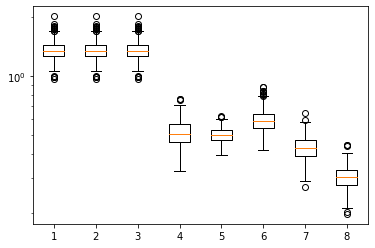

In [155]:
plt.boxplot([fr1, fr2, fr3, fr4, fr5, fr6, fr7, fr8])
plt.yscale("log")

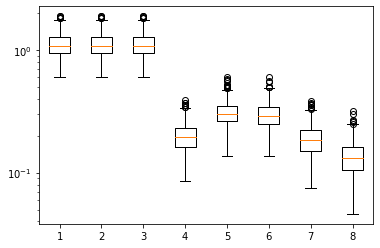

In [156]:
plt.boxplot([fp1, fp2, fp3, fp4, fp5, fp6, fp7, fp8])
plt.yscale("log")

### plots

In [54]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'

In [55]:
LA_risk_med = [np.median(r) for r in [ar1, br1, cr1, dr1, er1, fr1]]
LA_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar1, br1, cr1, dr1, er1, fr1]], [np.quantile(r, 0.75) - np.median(r) for r in [ar1, br1, cr1, dr1, er1, fr1]]]

In [56]:
EN_risk_med = [np.median(r) for r in [ar3, br3, cr3, dr3, er3, fr3]]
EN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar3, br3, cr3, dr3, er3, fr3]], [np.quantile(r, 0.75) - np.median(r) for r in [ar3, br3, cr3, dr3, er3, fr3]]]

In [57]:
FL_risk_med = [np.median(r) for r in [ar4, br4, cr4, dr4, er4, fr4]]
FL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar4, br4, cr4, dr4, er4, fr4]], [np.quantile(r, 0.75) - np.median(r) for r in [ar4, br4, cr4, dr4, er4, fr4]]]

In [58]:
SL_risk_med = [np.median(r) for r in [ar5, br5, cr5, dr5, er5, fr5]]
SL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar5, br5, cr5, dr5, er5, fr5]], [np.quantile(r, 0.75) - np.median(r) for r in [ar5, br5, cr5, dr5, er5, fr5]]]

In [59]:
GTVEST_risk_med = [np.median(r) for r in [ar6, br6, cr6, dr6, er6, fr6]]
GTVEST_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar6, br6, cr6, dr6, er6, fr6]], [np.quantile(r, 0.75) - np.median(r) for r in [ar6, br6, cr6, dr6, er6, fr6]]]

In [60]:
GTVORC_risk_med = [np.median(r) for r in [ar7, br7, cr7, dr7, er7, fr7]]
GTVORC_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar7, br7, cr7, dr7, er7, fr7]], [np.quantile(r, 0.75) - np.median(r) for r in [ar7, br7, cr7, dr7, er7, fr7]]]

In [61]:
GEN_risk_med = [np.median(r) for r in [ar8, br8, cr8, dr8, er8, fr8]]
GEN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar8, br8, cr8, dr8, er8, fr8]], [np.quantile(r, 0.75) - np.median(r) for r in [ar8, br8, cr8, dr8, er8, fr8]]]

In [62]:
xs = ["60","90" ,"120" ,"150" ,"180", "210"]

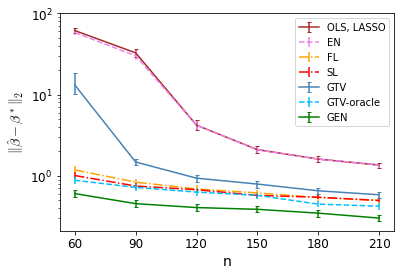

In [72]:
plt.errorbar(xs, LA_risk_med, yerr = LA_risk_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_risk_med, yerr = EN_risk_err, color = 'violet', fmt = '--',label = "EN")
plt.errorbar(xs, FL_risk_med, yerr = FL_risk_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_risk_med, yerr = SL_risk_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_risk_med, yerr = GTVEST_risk_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_risk_med, yerr = GTVORC_risk_err, color = 'deepskyblue', fmt = '--',label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_risk_med, yerr = GEN_risk_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.legend()
plt.yticks([ 1, 10, 100], size = 12)
plt.xticks(xs, size = 12)
plt.xlabel(r"n", size = 14)
plt.ylabel(r'$\| \hat{\beta} - \beta^*\|_2$', size = 14)
plt.savefig('135a_v2.jpg', bbox_inches='tight', dpi = 600)

In [64]:
LA_pred_med = [np.median(r) for r in [ap1, bp1, cp1, dp1, ep1, fp1]]
LA_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap1, bp1, cp1, dp1, ep1, fp1]], [np.quantile(r, 0.75) - np.median(r) for r in [ap1, bp1, cp1, dp1, ep1, fp1]]]

In [102]:
GEN_pred_err

[[0.13615666426358664,
  0.07546001463433649,
  0.05444495138258901,
  0.03742475856807684,
  0.033255118335615313,
  0.0253411924068207],
 [0.18438287337601578,
  0.09386438527894125,
  0.06175166612109101,
  0.04223167364529479,
  0.03267788558766588,
  0.029970824452236727]]

In [65]:
EN_pred_med = [np.median(r) for r in [ap3, bp3, cp3, dp3, ep3, fp3]]
EN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap3, bp3, cp3, dp3, ep3, fp3]], [np.quantile(r, 0.75) - np.median(r) for r in [ap3, bp3, cp3, dp3, ep3, fp3]]]

In [66]:
FL_pred_med = [np.median(r) for r in [ap4, bp4, cp4, dp4, ep4, fp4]]
FL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap4, bp4, cp4, dp4, ep4, fp4]], [np.quantile(r, 0.75) - np.median(r) for r in [ap4, bp4, cp4, dp4, ep4, fp4]]]

In [67]:
SL_pred_med = [np.median(r) for r in [ap5, bp5, cp5, dp5, ep5, fp5]]
SL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap5, bp5, cp5, dp5, ep5, fp5]], [np.quantile(r, 0.75) - np.median(r) for r in [ap5, bp5, cp5, dp5, ep5, fp5]]]

In [68]:
GTVEST_pred_med = [np.median(r) for r in [ap6, bp6, cp6, dp6, ep6, fp6]]
GTVEST_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap6, bp6, cp6, dp6, ep6, fp6]], [np.quantile(r, 0.75) - np.median(r) for r in [ap6, bp6, cp6, dp6, ep6, fp6]]]

In [69]:
GTVORC_pred_med = [np.median(r) for r in [ap7, bp7, cp7, dp7, ep7, fp7]]
GTVORC_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap7, bp7, cp7, dp7, ep7, fp7]], [np.quantile(r, 0.75) - np.median(r) for r in [ap7, bp7, cp7, dp7, ep7, fp7]]]

In [70]:
GEN_pred_med = [np.median(r) for r in [ap8, bp8, cp8, dp8, ep8, fp8]]
GEN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap8, bp8, cp8, dp8, ep8, fp8]], [np.quantile(r, 0.75) - np.median(r) for r in [ap8, bp8, cp8, dp8, ep8, fp8]]]

In [1]:
plt.errorbar(xs, LA_pred_med, yerr = LA_pred_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_pred_med, yerr = EN_pred_err, color = 'violet', fmt = '--',label = "EN")
plt.errorbar(xs, FL_pred_med, yerr = FL_pred_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_pred_med, yerr = SL_pred_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_pred_med, yerr = GTVEST_pred_err, capsize = 2,color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_pred_med, yerr = GTVORC_pred_err, color = 'deepskyblue', fmt = '--',label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_pred_med, yerr = GEN_pred_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([0.1, 1, 10, 100, 1000, 10000], size = 12)
plt.xticks(xs, size = 12)
plt.xlabel(r"n", size = 14)
plt.ylabel(r'$\frac{1}{n}\| X_{\mathrm{test}}(\hat{\beta} - \beta^*)\|_2^2$', size = 14)
plt.savefig('135b_v2.jpg', bbox_inches='tight', dpi = 600)

NameError: name 'plt' is not defined